# <span style="color:blue">[</span> Lab 11-1 : MNIST and Convolutional Neural Network <span style="color:blue">]</span>
<p>출처: <a href="http://hunkim.github.io/ml/" title="모두를 위한 머신러닝과 딥러닝의 강의" target="blank">모두를 위한 머신러닝과 딥러닝의 강의</a></p> <br/>
> [CS 20SI: Tensorflow for Deep Learning Research](http://web.stanford.edu/class/cs20si/)

# Import Module

In [1]:
# Lab 11 MNIST and Convolutional Neural Network
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

# Step 1: Read in data
> using TF Learn's built in function to load MNIST data to the folder data/mnist <br/>
> Check out [MNIST For ML Beginners](https://www.tensorflow.org/get_started/mnist/beginners) for more information about the mnist dataset

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Step 2: Define paramaters for the model

In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.set_random_seed(777)  # reproducibility

# Step 3: Create placeholders for features and labels
> each image in the MNIST data is of shape 28*28 = 784 <br/>
> therefore, each image is represented with a 1x784 tensor <br/>
> there are 10 classes for each image, corresponding to digits 0 - 9.  <br/>
> each lable is one hot vector.

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# Step 4 + 5: Create weights + do inference
> the model is conv -> relu -> pool -> conv -> relu -> pool -> fully connected -> softmax


> w is initialized to random variables with normal random distribution. <br/>
>    Conv     -> (?, 28, 28, 32) <br/>
>    Pool     -> (?, 14, 14, 32)

In [5]:
# ---------------------------------------------------------------
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''
# ---------------------------------------------------------------
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# ---------------------------------------------------------------
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# Step 6: Define loss function
> use softmax cross entropy with logits as the loss function
> compute mean cross entropy, softmax is applied internally

In [6]:
# define cost/loss 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Step 7: Define training op
> using AdamOptimizer with learning rate of {learning_rate} to minimize cost

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initialize session & global variables

In [8]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train the model

In [9]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.342078431
Epoch: 0002 cost = 0.092851951
Epoch: 0003 cost = 0.068113291
Epoch: 0004 cost = 0.055210830
Epoch: 0005 cost = 0.046923109
Epoch: 0006 cost = 0.041235309
Epoch: 0007 cost = 0.035882169
Epoch: 0008 cost = 0.031362815
Epoch: 0009 cost = 0.027749437
Epoch: 0010 cost = 0.024625990
Epoch: 0011 cost = 0.022472894
Epoch: 0012 cost = 0.018263866
Epoch: 0013 cost = 0.016049490
Epoch: 0014 cost = 0.015249646
Epoch: 0015 cost = 0.013146065
Learning Finished!


# Test the model and check accuracy

Accuracy: 0.9881
Label:  [7]
Prediction:  [7]


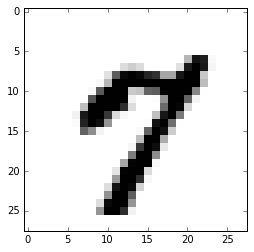

'\nEpoch: 0001 cost = 0.340291267\nEpoch: 0002 cost = 0.090731326\nEpoch: 0003 cost = 0.064477619\nEpoch: 0004 cost = 0.050683064\nEpoch: 0005 cost = 0.041864835\nEpoch: 0006 cost = 0.035760704\nEpoch: 0007 cost = 0.030572132\nEpoch: 0008 cost = 0.026207981\nEpoch: 0009 cost = 0.022622454\nEpoch: 0010 cost = 0.019055919\nEpoch: 0011 cost = 0.017758641\nEpoch: 0012 cost = 0.014156652\nEpoch: 0013 cost = 0.012397016\nEpoch: 0014 cost = 0.010693789\nEpoch: 0015 cost = 0.009469977\nLearning Finished!\nAccuracy: 0.9885\n'

In [10]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# show image
plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

'''
Epoch: 0001 cost = 0.340291267
Epoch: 0002 cost = 0.090731326
Epoch: 0003 cost = 0.064477619
Epoch: 0004 cost = 0.050683064
Epoch: 0005 cost = 0.041864835
Epoch: 0006 cost = 0.035760704
Epoch: 0007 cost = 0.030572132
Epoch: 0008 cost = 0.026207981
Epoch: 0009 cost = 0.022622454
Epoch: 0010 cost = 0.019055919
Epoch: 0011 cost = 0.017758641
Epoch: 0012 cost = 0.014156652
Epoch: 0013 cost = 0.012397016
Epoch: 0014 cost = 0.010693789
Epoch: 0015 cost = 0.009469977
Learning Finished!
Accuracy: 0.9885
'''
